In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-classification/train (2).csv
/kaggle/input/fake-news-classification/evaluation.csv
/kaggle/input/fake-news-classification/test (1).csv


### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import itertools

In [5]:
df1 = pd.read_csv('/kaggle/input/fake-news-classification/train (2).csv', sep=';')

In [6]:
df1.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [7]:
df2 = pd.read_csv('/kaggle/input/fake-news-classification/evaluation.csv', sep=';')

In [9]:
df2.head()

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0


In [10]:
df3 = pd.read_csv('/kaggle/input/fake-news-classification/test (1).csv', sep=';')

In [11]:
df3.head()

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1


In [12]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [13]:
df.shape

(40587, 4)

In [14]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [15]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [16]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

Unnamed: 0
0        3
5407     3
5420     3
5419     3
5418     3
        ..
13533    1
13534    1
13535    1
13536    1
24352    1
Name: count, Length: 24353, dtype: int64

title
no title                                                                                                                          153
Factbox: Trump fills top jobs for his administration                                                                               14
newsticker                                                                                                                         11
Factbox: Contenders for senior jobs in Trump's administration                                                                       8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                           6
                                                                                                                                 ... 
Moroccan police 

In [17]:
df.nunique()

Unnamed: 0    24353
title         39997
text          40585
label             2
dtype: int64

In [18]:
df['Unnamed: 0']

0           0
1           1
2           2
3           3
4           4
         ... 
40582    8112
40583    8113
40584    8114
40585    8115
40586    8116
Name: Unnamed: 0, Length: 40587, dtype: int64

In [19]:
df.label

0        1
1        1
2        0
3        1
4        0
        ..
40582    1
40583    1
40584    1
40585    0
40586    0
Name: label, Length: 40587, dtype: int64

In [20]:
df.label.value_counts()

label
1    21924
0    18663
Name: count, dtype: int64

In [21]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [22]:
df = df.drop(columns='Unnamed: 0')

In [23]:
df.shape

(40587, 3)

In [24]:
df.dtypes

title    object
text     object
label     int64
dtype: object

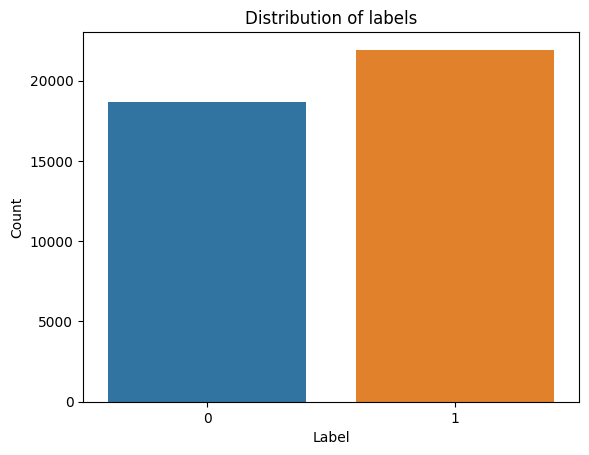

In [25]:
sns.countplot(data=df, x='label')
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

In [26]:
import re 
from collections import Counter

In [27]:
def preprocess_text(text):

    text = re.sub(r'\W+', ' ', text)
    tokens = text.lower().split()
    stopwords = set(['the', 'a', 'and', 'is', 'to', 'in'])
    return [word for word in tokens if word not in stopwords]

In [28]:
all_words = df['title'].dropna().apply(preprocess_text).sum()
word_counts = Counter(all_words).most_common(10)

In [29]:
all_words

['palestinians',
 'switch',
 'off',
 'christmas',
 'lights',
 'bethlehem',
 'anti',
 'trump',
 'protest',
 'china',
 'says',
 'trump',
 'call',
 'with',
 'taiwan',
 'president',
 'won',
 't',
 'change',
 'island',
 's',
 'status',
 'fail',
 'trump',
 'organization',
 's',
 'credit',
 'score',
 'will',
 'make',
 'you',
 'laugh',
 'zimbabwe',
 'military',
 'chief',
 's',
 'china',
 'trip',
 'was',
 'normal',
 'visit',
 'beijing',
 'says',
 'most',
 'uncourageous',
 'president',
 'ever',
 'receives',
 'courage',
 'award',
 'proceeds',
 'whine',
 'about',
 'current',
 'president',
 'suspected',
 'boko',
 'haram',
 'suicide',
 'bombers',
 'kill',
 'at',
 'least',
 '13',
 'nigeria',
 'officials',
 'watch',
 'john',
 'oliver',
 'presents',
 'gop',
 'debates',
 'as',
 'clowntown',
 'f',
 'ck',
 'world',
 'sh',
 'tshow',
 '2016',
 'senate',
 'democrats',
 'ask',
 'trump',
 'attorney',
 'general',
 'pick',
 'recuse',
 'himself',
 'from',
 'russia',
 'probes',
 'trump',
 'humiliates',
 'republica

In [30]:
word_counts

[('s', 13957),
 ('trump', 13384),
 ('of', 6909),
 ('for', 6534),
 ('video', 6112),
 ('on', 6079),
 ('u', 4998),
 ('says', 3411),
 ('with', 3350),
 ('obama', 2405)]

In [31]:
word_freq_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

In [32]:
word_freq_df

,Word,Frequency
0,s,13957
1,trump,13384
2,of,6909
3,for,6534
4,video,6112
5,on,6079
6,u,4998
7,says,3411
8,with,3350
9,obama,2405


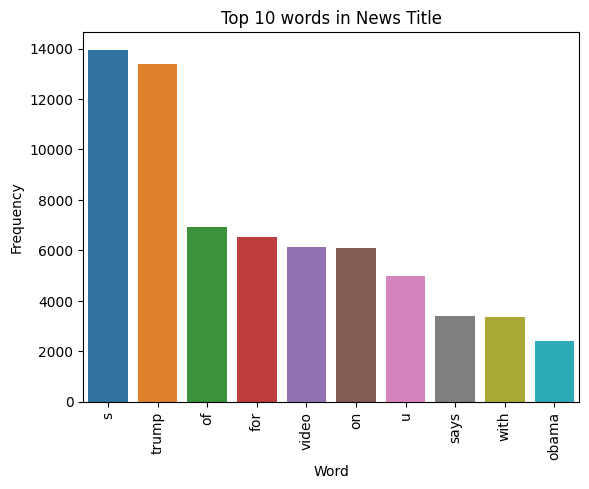

In [33]:
sns.barplot(data=word_freq_df, x='Word', y='Frequency')
plt.title('Top 10 words in News Title')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
def plot_top_ngrams(text_data, n=2, top_n=10):

    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(text_data.dropna())
    ngram_counts = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T
    top_ngrams = ngram_counts.nlargest(top_n, 'count')

    # plot the Top 10 2-grams 
    sns.barplot(data=top_ngrams.reset_index(), x='count', y='index')
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()

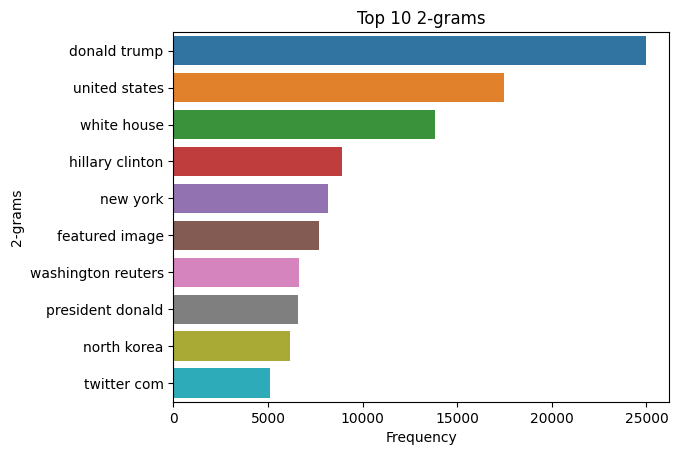

In [36]:
# Plot the Top 10 bigram in text column
plot_top_ngrams(df['text'], n=2, top_n=10)

In [37]:
df['text_length'] = df['text'].apply(lambda x : len(str(x)))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


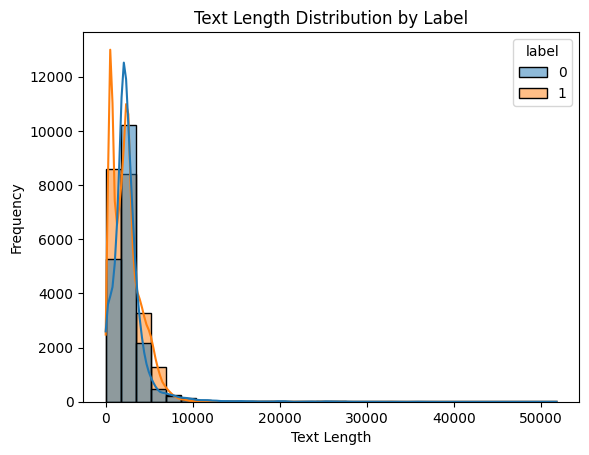

In [38]:
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.show()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df['label'] = df['label']

In [41]:
tfidf_avg = tfidf_df.groupby('label').mean().T

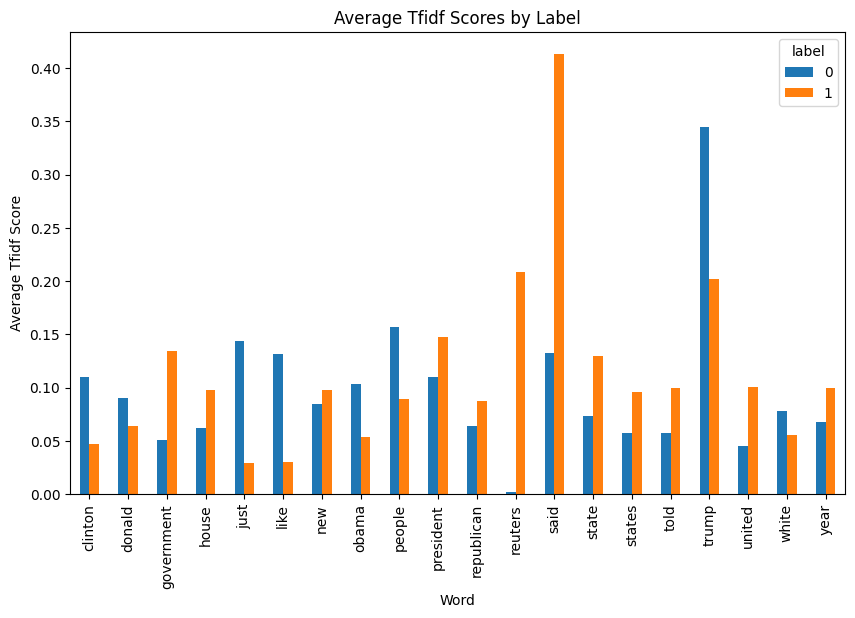

In [42]:
# Plot the average TFIDF Score of Text Column

tfidf_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Tfidf Scores by Label')
plt.ylabel('Average Tfidf Score')
plt.xlabel('Word')

plt.show()

In [43]:
from sklearn.decomposition import PCA

In [44]:
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

In [45]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

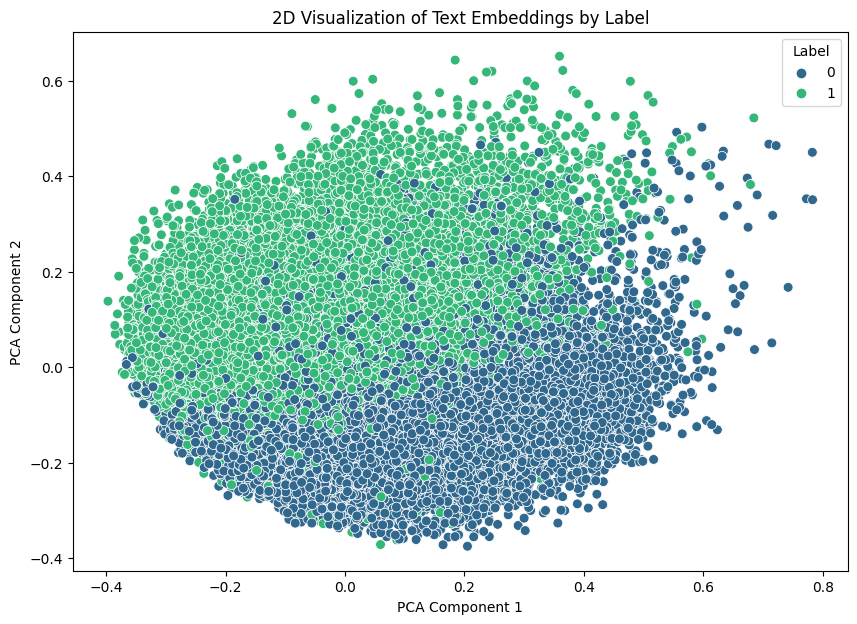

In [46]:
# Plot of Text Embeddings 
plt.figure(figsize=(10,7))

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['label'], palette='viridis', s=50)
plt.title('2D Visualization of Text Embeddings by Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')

plt.show()

### Word Cloud for Title or Text by label

In [ ]:
!pip install wordcloud

In [47]:
from wordcloud import WordCloud

In [48]:
def plot_wordcloud(label):

    text = ' '.join(df[df['label'] == label]['text'].fillna('').tolist())
    wordcloud = WordCloud(width=800,
                         height=400, 
                          background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of label {label}')
    plt.show()

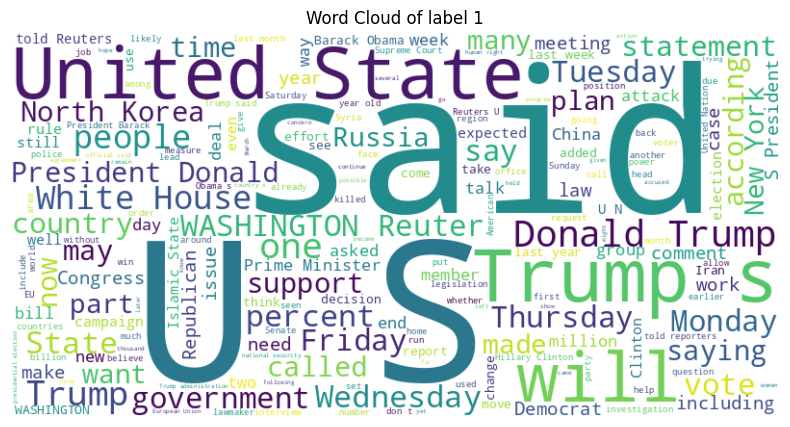

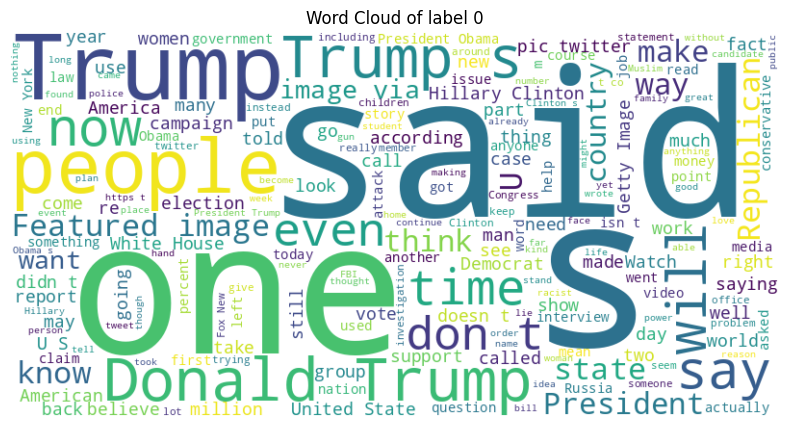

In [49]:
for label in df['label'].unique():
    plot_wordcloud(label)

### Sentiment Analysis

In [ ]:
!pip install textblob

In [50]:
from textblob import TextBlob

In [51]:
df['sentiment'] = df['text'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


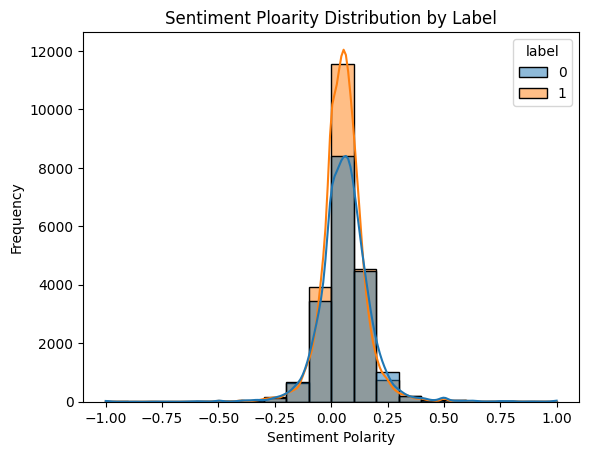

In [52]:
sns.histplot(data=df,
            x='sentiment', 
            hue='label',
            bins=20,
            kde=True)

plt.title('Sentiment Ploarity Distribution by Label')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.show()

In [53]:
# initialize Count Vectorizer to Count word co-occurance
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].dropna())
word_cooccurance = (X.T * X)

In [54]:
word_cooccurance.setdiag(0)

In [55]:
word_cooccurance_df = pd.DataFrame(word_cooccurance.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

In [56]:
word_cooccurance_df

,clinton,donald,government,house,just,like,new,obama,people,president,republican,reuters,said,state,states,told,trump,united,white,year
clinton,0,31204,19172,26312,25608,25625,39377,37538,34771,50008,34155,18011,105388,47955,23162,18854,158020,13957,23883,15979
donald,31204,0,11790,22487,24495,22891,24295,21585,32318,51767,29089,14880,83911,18155,21742,14833,219499,18345,21597,13225
government,19172,11790,0,20786,15386,16322,29839,19197,37553,40334,13570,29994,131384,41620,28383,21374,62386,26203,13699,26196
house,26312,22487,20786,0,17239,15730,27296,33733,26997,60750,43331,23432,118928,25818,20549,21061,144379,16184,55837,20532
just,25608,24495,15386,17239,0,29107,22318,22167,43111,35595,16522,7863,65496,21953,17243,14081,114926,13175,18703,16065
like,25625,22891,16322,15730,29107,0,22356,21757,40974,32911,16440,8045,63289,20260,16597,12291,106898,12918,18255,15474
new,39377,24295,29839,27296,22318,22356,0,27354,38530,51182,28529,26177,128547,39803,32060,21534,135491,25070,21852,26800
obama,37538,21585,19197,33733,22167,21757,27354,0,31568,84961,27474,13534,87775,26979,25702,14555,114362,20807,30727,18540
people,34771,32318,37553,26997,43111,40974,38530,31568,0,56173,28674,25188,147993,41904,34905,25312,157548,29683,32811,29413
president,50008,51767,40334,60750,35595,32911,51182,84961,56173,0,49003,40451,211968,47742,51109,35479,286401,46599,48814,36034


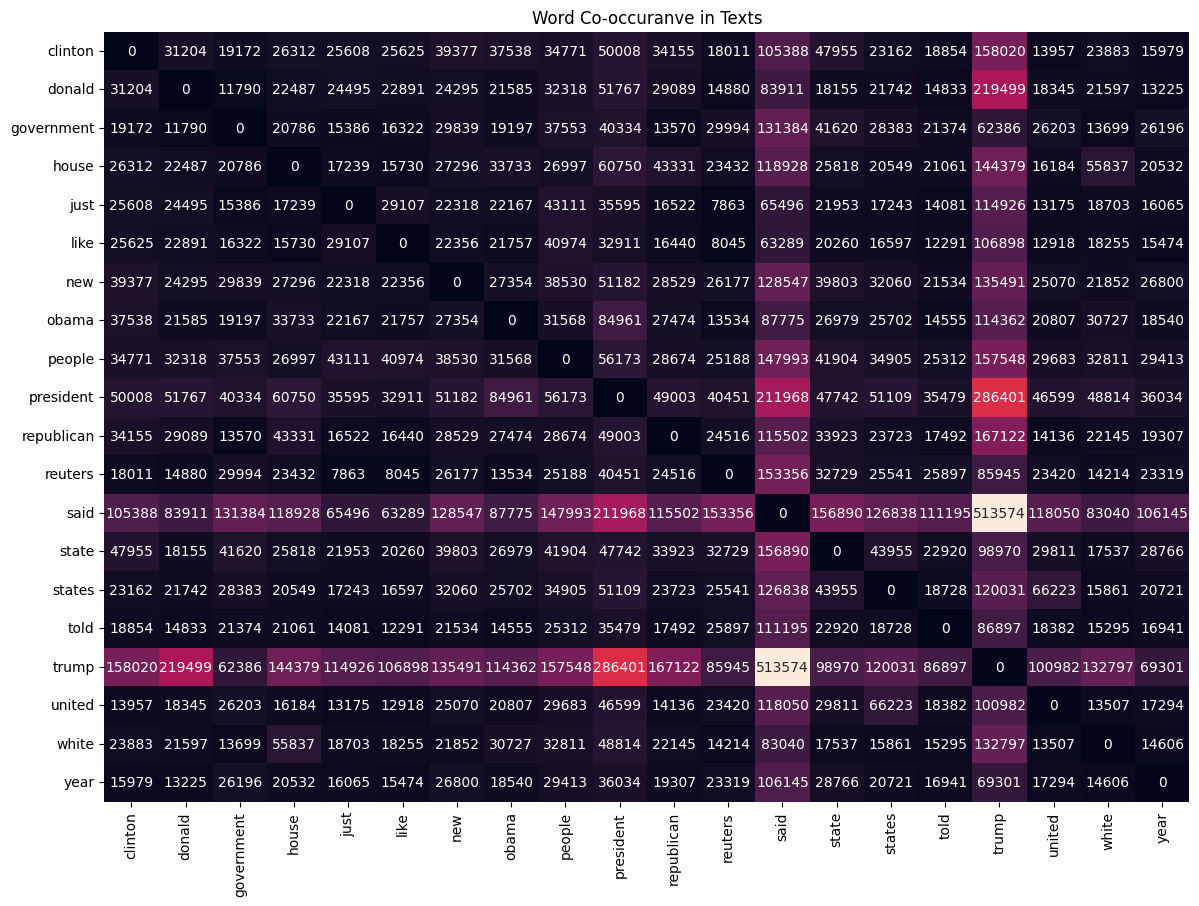

In [57]:
plt.figure(figsize=(14, 10))
sns.heatmap(data=word_cooccurance_df, 
           annot=True,
           cbar=False,
           fmt='d')

plt.title('Word Co-occuranve in Texts')
plt.show()

In [58]:
# Calculate the Text Length and Word Counts

df['text_length'] = df['text'].apply(lambda x : len(str(x)))
df['word_count'] = df['text'].apply(lambda x : len(str(x).split()))

In [59]:
df

,title,text,label,text_length,sentiment,word_count
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,1335,0.036639,212
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,373,0.000000,59
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,2072,0.081319,354
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,2692,0.044048,428
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,1946,-0.002671,314
...,...,...,...,...,...,...
40582,Sanders at Vatican says rich-poor gap worse th...,VATICAN CITY (Reuters) - U.S. presidential can...,1,3325,0.064717,567
40583,how trump happened,force and fanaticism wahhabism in saudi arabi...,1,2999,0.199080,468
40584,Turkey will take two steps if Germany takes on...,"ISTANBUL (Reuters) - Turkey, whose relations w...",1,621,0.041964,99
40585,BREAKING: DEVICE THAT BUSTED HILLARY CLINTON D...,Here s why Clinton and Abedin should be flippi...,0,1730,0.026337,270


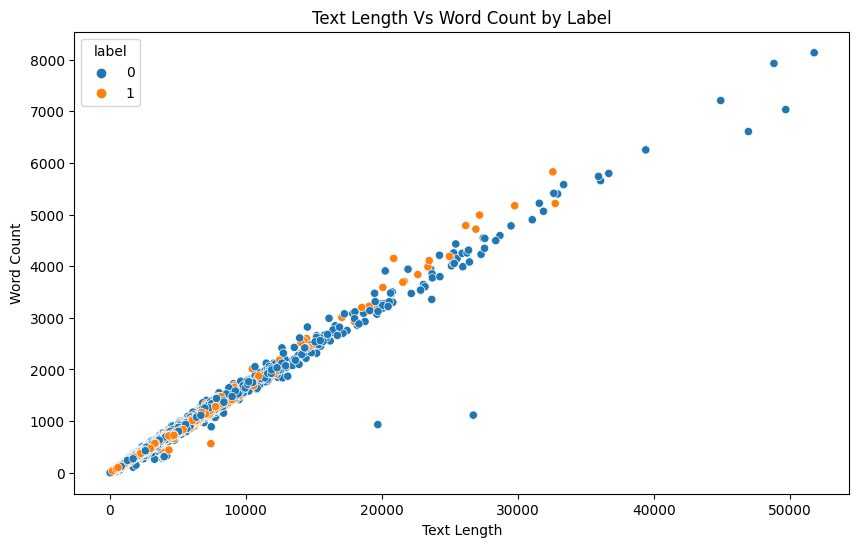

In [60]:
# Plot Text Length and Word Count

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df,
               x='text_length',
               y='word_count',
               hue='label')

plt.title('Text Length Vs Word Count by Label')
plt.xlabel('Text Length')
plt.ylabel('Word Count')

plt.show()

In [61]:
# Extract bigrams (2-grams) for the Text Column

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].fillna(''))

In [62]:
# Create DataFrame for bigram counts
bigrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigrams_df['label'] = df['label']

In [63]:
# Calculate bigram frequency for each label
bigrams_avg = bigrams_df.groupby('label').mean().T

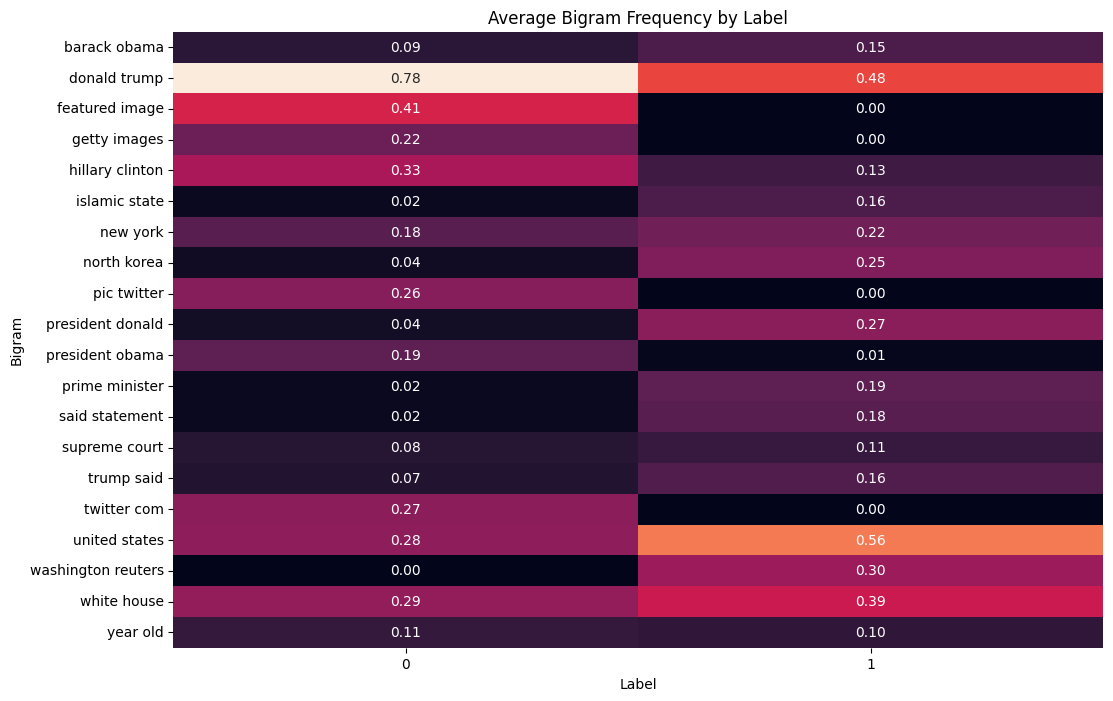

In [64]:
# Plot a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data=bigrams_avg,
           annot=True,
           cbar=False,
           fmt='.2f')

plt.title('Average Bigram Frequency by Label')
plt.xlabel('Label')
plt.ylabel('Bigram')
plt.show()

In [65]:
# Calculate average word length with handling for empty or space-onlt text entries

df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if x and len(str(x).split()) > 0 else 0)

Apply the log transformation to the average word length column to manage skewness

In [66]:
df['log_avg_word_length'] = np.log1p(df['avg_word_length'])  # log1p handles zero values

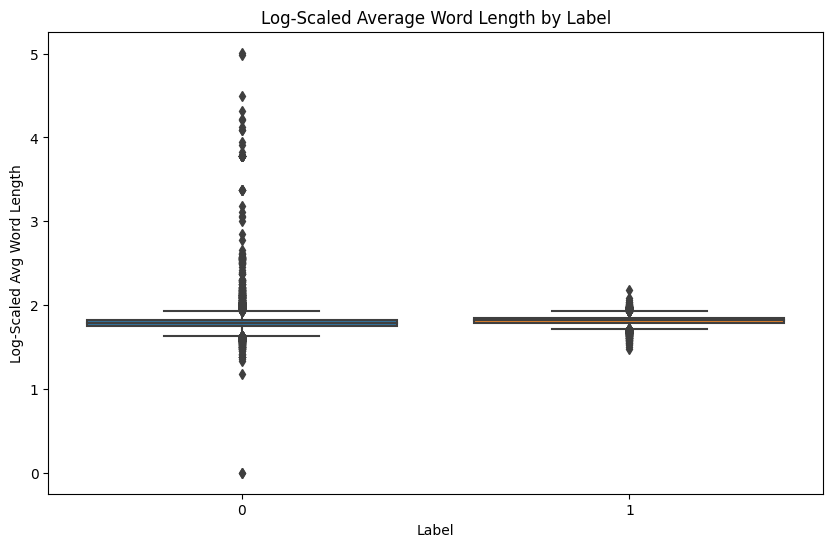

In [67]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='label', y='log_avg_word_length')
plt.title('Log-Scaled Average Word Length by Label')
plt.xlabel('Label')
plt.ylabel('Log-Scaled Avg Word Length')

plt.show()

In [68]:
# Create a Tfidf Vectorizer and apply it to text column

tfidf = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

In [69]:
# Get tfidf value in DataFrame with label as column 
unique_words = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
unique_words['label'] = df['label']

In [70]:
unique_words

,according,administration,american,campaign,clinton,country,court,democratic,did,donald,...,time,told,trump,twitter,united,washington,white,year,years,label
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.169710,...,0.000000,0.000000,0.622593,0.00000,0.210766,0.208671,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.325439,...,0.000000,0.000000,0.298475,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.155103,0.000000,0.0,0.000000,0.510186,0.000000,0.0,0.000000,0.000000,0.000000,...,0.131374,0.000000,0.822814,0.00000,0.000000,0.000000,0.000000,0.000000,0.146187,0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.223734,0.0,0.000000,0.000000,0.000000,...,0.206012,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.409222,0.000000,1
4,0.000000,0.141401,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.119290,0.093808,...,0.000000,0.000000,0.086035,0.00000,0.000000,0.000000,0.246676,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40582,0.000000,0.000000,0.0,0.316155,0.119885,0.000000,0.0,0.347907,0.000000,0.000000,...,0.092612,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.275946,0.000000,1
40583,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.550136,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1
40584,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.349316,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1
40585,0.000000,0.000000,0.0,0.071313,0.811249,0.000000,0.0,0.078475,0.204082,0.000000,...,0.000000,0.300634,0.000000,0.00000,0.000000,0.000000,0.000000,0.062243,0.000000,0


In [71]:
# calculate the average tfidf value by label

top_words_by_label = unique_words.groupby('label').mean().T
top_words_by_label['max_label'] = top_words_by_label.idxmax(axis=1) # label with highest tf-idf for each label

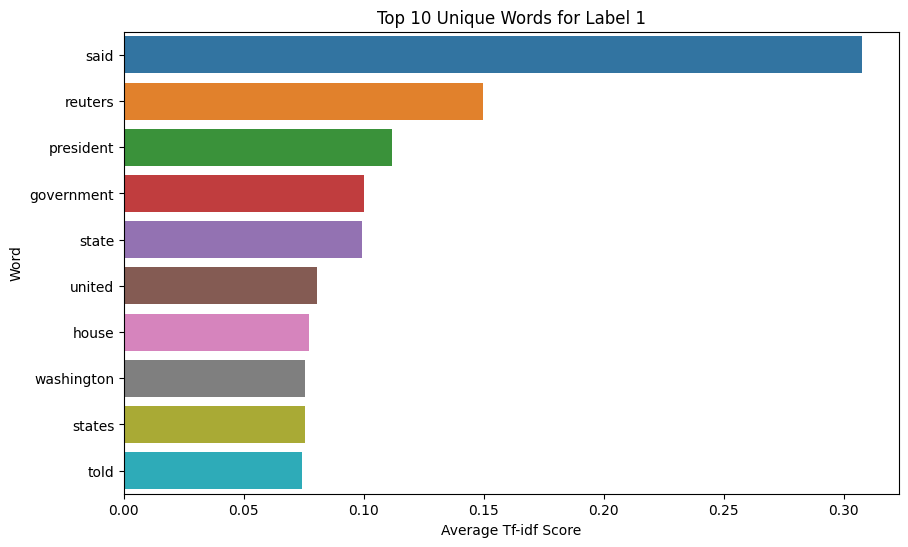

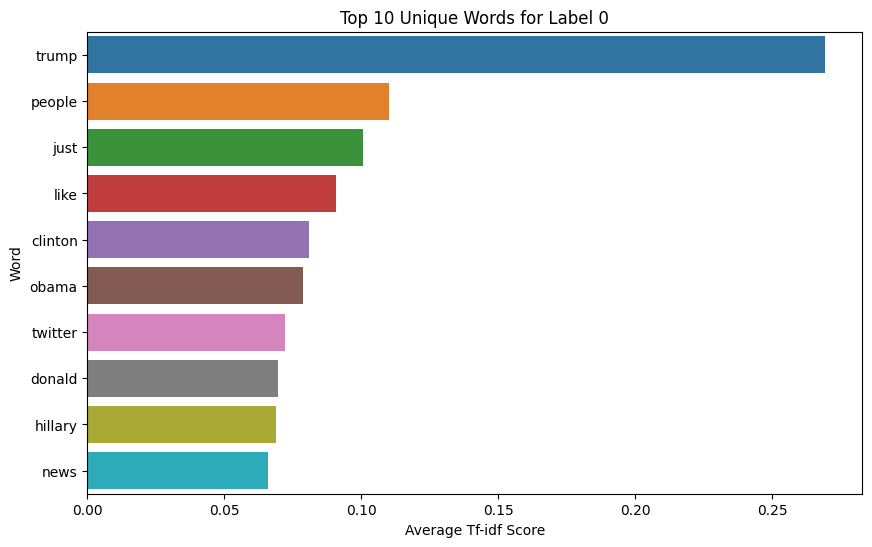

In [72]:
# iterate over each label and plot the top 10 words unique to that label

for label in df['label'].unique():

    top_words = top_words_by_label[top_words_by_label['max_label'] == label].nlargest(10, label)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words[label],
               y=top_words.index,
               orient='h')
    plt.title(f'Top 10 Unique Words for Label {label}')
    plt.xlabel('Average Tf-idf Score')
    plt.ylabel('Word')
    plt.show()

In [73]:
# Extract top words for analysis

vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['text'].fillna(''))

# create DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts['label'] = df['label']

In [74]:
# calculate the word frequency by label
word_freq_by_label = word_counts.groupby('label').sum().T

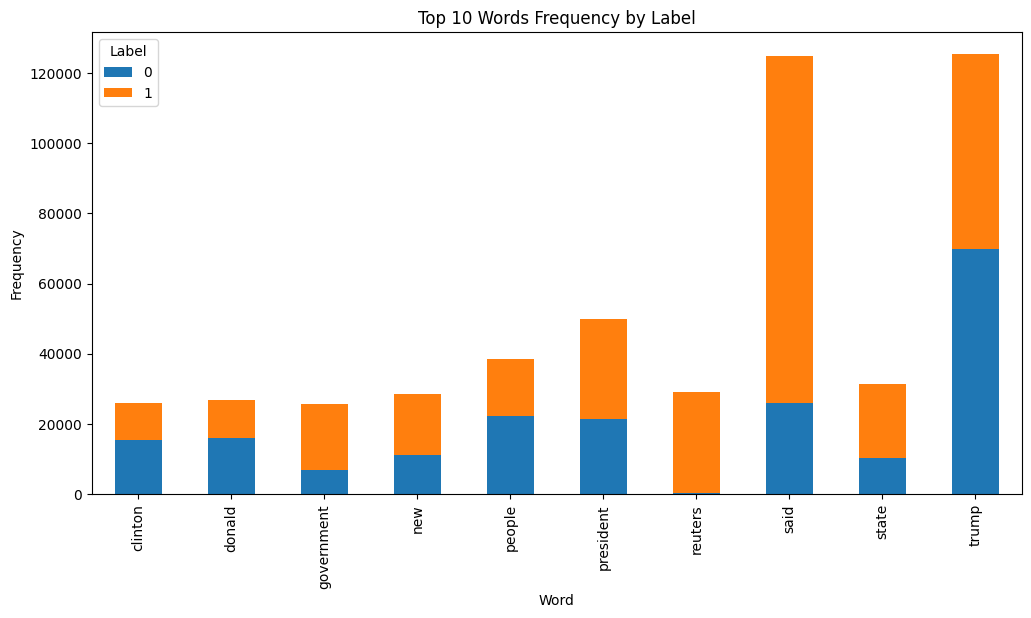

In [75]:
# Plot stacked bar chart 
word_freq_by_label.plot(kind='bar',
                       stacked=True,
                       figsize=(12,6))
plt.title('Top 10 Words Frequency by Label')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.legend(title='Label')

plt.show()

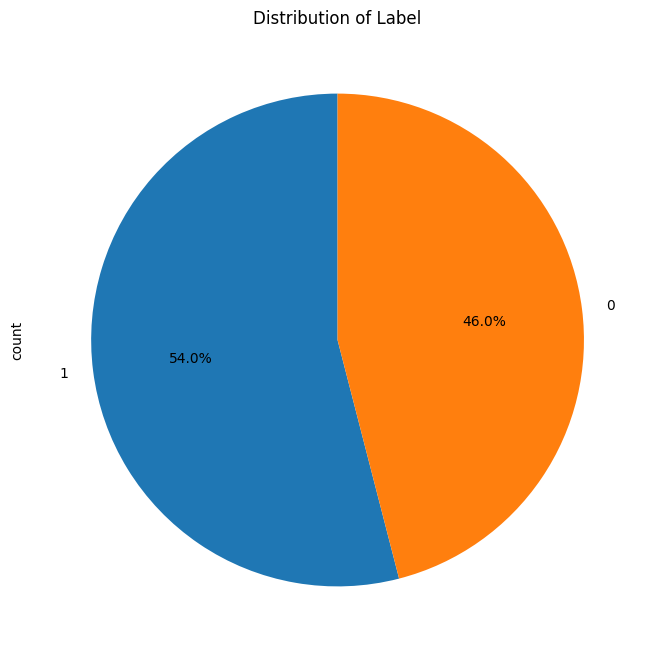

In [76]:
plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%',
                                   startangle=90)
plt.title('Distribution of Label')
plt.show()

### Neural Network

In [77]:
!pip install torch

In [78]:
import torch

In [83]:
# device selection: MPS (for macOS with Apple Silicon), CUDA, or CPU
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

Using Device: cpu


In [85]:
import torch.nn as nn 

class NewsClassifier(nn.Module):

    def __init__(self, input_dim):

        super(NewsClassifier, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_dim, 128),
                                    nn.ReLU(),
                                    nn.Linear(128, 64),
                                    nn.ReLU(),
                                    nn.Linear(64, 1),
                                    nn.Sigmoid())

    def forward(self, x):

        return self.network(x)

In [86]:
# combine title and text, then vectorize them

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['title'] + " " + df['text']).toarray()
y = df['label'].values # label for training

In [87]:
# convert data to Pytorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [88]:
# move tensors to the selected device
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [91]:
# parameters

from sklearn.model_selection import KFold

num_epochs = 5
kf = KFold(n_splits=5, shuffle=True, random_state=101)
fold_result = []
best_accuracy = 0 
best_auc = 0 # initilize best AUC score
best_model_state = None # initilize to store the best model state

In [92]:
from torch.utils.data import DataLoader, TensorDataset

In [96]:
import torch.optim as optim

In [97]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [99]:
# 5-Fold Cross-Validation

for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f"Fold {fold+1}")

    # split data for this fold
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # DataLoader for the current fold
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    # initilize the model, loss function and optimizer for each fold
    model = NewsClassifier(input_dim=1000).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # training loop for each fold
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epochs {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

    # evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_preds = (val_outputs >= 0.5).float()

        # calculate matrics for current fold
        accuracy = accuracy_score(y_val.cpu(), val_preds.cpu())
        auc = roc_auc_score(y_val.cpu(), val_outputs.cpu())
        print(f'Fold {fold+1} Accuracy : {accuracy:.4f}, AUC: {auc:.4f}')

        # store result for this fold
        fold_result.append((accuracy, auc))

        # save the model if it's the best based on AUC
        if auc > best_auc:
            best_accuracy = accuracy
            best_auc = auc
            best_model_state = model.state_dict() # save the best model's dict

Fold 1
Epochs 1/5, Loss: 0.1048
Epochs 2/5, Loss: 0.0002
Epochs 3/5, Loss: 0.0005
Epochs 4/5, Loss: 0.0007
Epochs 5/5, Loss: 0.0000
Fold 1 Accuracy : 0.9741, AUC: 0.9955
Fold 2
Epochs 1/5, Loss: 0.0020
Epochs 2/5, Loss: 0.0000
Epochs 3/5, Loss: 0.0001
Epochs 4/5, Loss: 0.0802
Epochs 5/5, Loss: 0.0000
Fold 2 Accuracy : 0.9751, AUC: 0.9959
Fold 3
Epochs 1/5, Loss: 0.0373
Epochs 2/5, Loss: 0.2800
Epochs 3/5, Loss: 0.0032
Epochs 4/5, Loss: 0.0012
Epochs 5/5, Loss: 0.0030
Fold 3 Accuracy : 0.9743, AUC: 0.9957
Fold 4
Epochs 1/5, Loss: 0.0011
Epochs 2/5, Loss: 0.8715
Epochs 3/5, Loss: 0.0137
Epochs 4/5, Loss: 0.0024
Epochs 5/5, Loss: 0.0009
Fold 4 Accuracy : 0.9734, AUC: 0.9961
Fold 5
Epochs 1/5, Loss: 0.0062
Epochs 2/5, Loss: 0.0055
Epochs 3/5, Loss: 0.0028
Epochs 4/5, Loss: 0.0123
Epochs 5/5, Loss: 0.0000
Fold 5 Accuracy : 0.9704, AUC: 0.9955


In [101]:
# calculate average metrics across all folds
average_accuracy = np.mean([result[0] for result in fold_result])
average_auc = np.mean([result[1] for result in fold_result])

# provide results
print(f'5-Fold Cross-Validation Results')
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average AUC: {average_auc:.4f}')

5-Fold Cross-Validation Results
Average Accuracy: 0.9735
Average AUC: 0.9957


In [102]:
# after cross-validation, save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'news_classifier.pth')
    print(f'Best Model w/ Accuracy: {best_accuracy:.4f}, AUC: {best_auc:.4f}')

# load the model for inference
loaded_model = NewsClassifier(input_dim=1000).to(device)
loaded_model.load_state_dict(torch.load('news_classifier.pth', weights_only=True))
loaded_model.eval()

Best Model w/ Accuracy: 0.9734, AUC: 0.9961


NewsClassifier(
  (network): Sequential(
    (0): Linear(in_features=1000, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [103]:
def predict(model, X):
    """
    Generates a binary prediction ('True' or 'False') for the input data using the specified model.

    Params:
        model: torch.nn.Module
        X: torch.Tensor

    Returns:
        str
    """
    with torch.no_grad():
        output = model(X)
        prediction = (output >= 0.5).float()
    return 'True' if prediction.item() == 1 else 'False'

In [104]:
# new article for inference (no label)
sample_title = 'Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest.'
sample_text = 'RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus traditional birthplace.'

# combine and vectorize, then move to device
sample_combined = sample_title + ' ' + sample_text
sample_vector = vectorizer.transform([sample_combined]).toarray()
sample_tensor = torch.tensor(sample_vector, dtype=torch.float32).to(device)

# run inference
print("Prediction:", predict(loaded_model, sample_tensor))

Prediction: True


In [106]:
import joblib

In [107]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']